In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import re

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#import fasttext
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import neattext as nt
import neattext.functions as nfx
from sklearn import tree
import matplotlib
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import json
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import functools
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
 
warnings.filterwarnings(action='ignore')

from code_utils.utils import preprocess,aplatir

In [2]:
df_ipcc=pd.read_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\data_ipcc.jsonl', lines= True).dropna(subset=['year'])

In [3]:
df_ipcc=df_ipcc.dropna(subset=['year'])

In [4]:
df_not_ipcc=pd.read_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\data_not_ipcc.jsonl', lines= True)

In [4]:
df_ipcc=df_ipcc[['year','doi', 'title','topics','locations_names','locations_ids']]

In [6]:
df_not_ipcc=df_not_ipcc[['doi', 'title','topics','locations_names','locations_ids']]

In [5]:
df_ipcc=df_ipcc.dropna(subset=['year','doi', 'title','topics','locations_names','locations_ids']).drop_duplicates(subset=['doi'])

In [8]:
df_not_ipcc=df_not_ipcc.dropna(subset=['doi', 'title','topics','locations_names','locations_ids'])

In [6]:
data_counts=pd.Series([int(x) for x in list(df_ipcc.year.dropna())]).value_counts()
data_counts=pd.Series(dict(data_counts)).sort_index()

Visualisation themes

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\haallat\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\haallat\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:matplotlib.font_manager:findfont: 

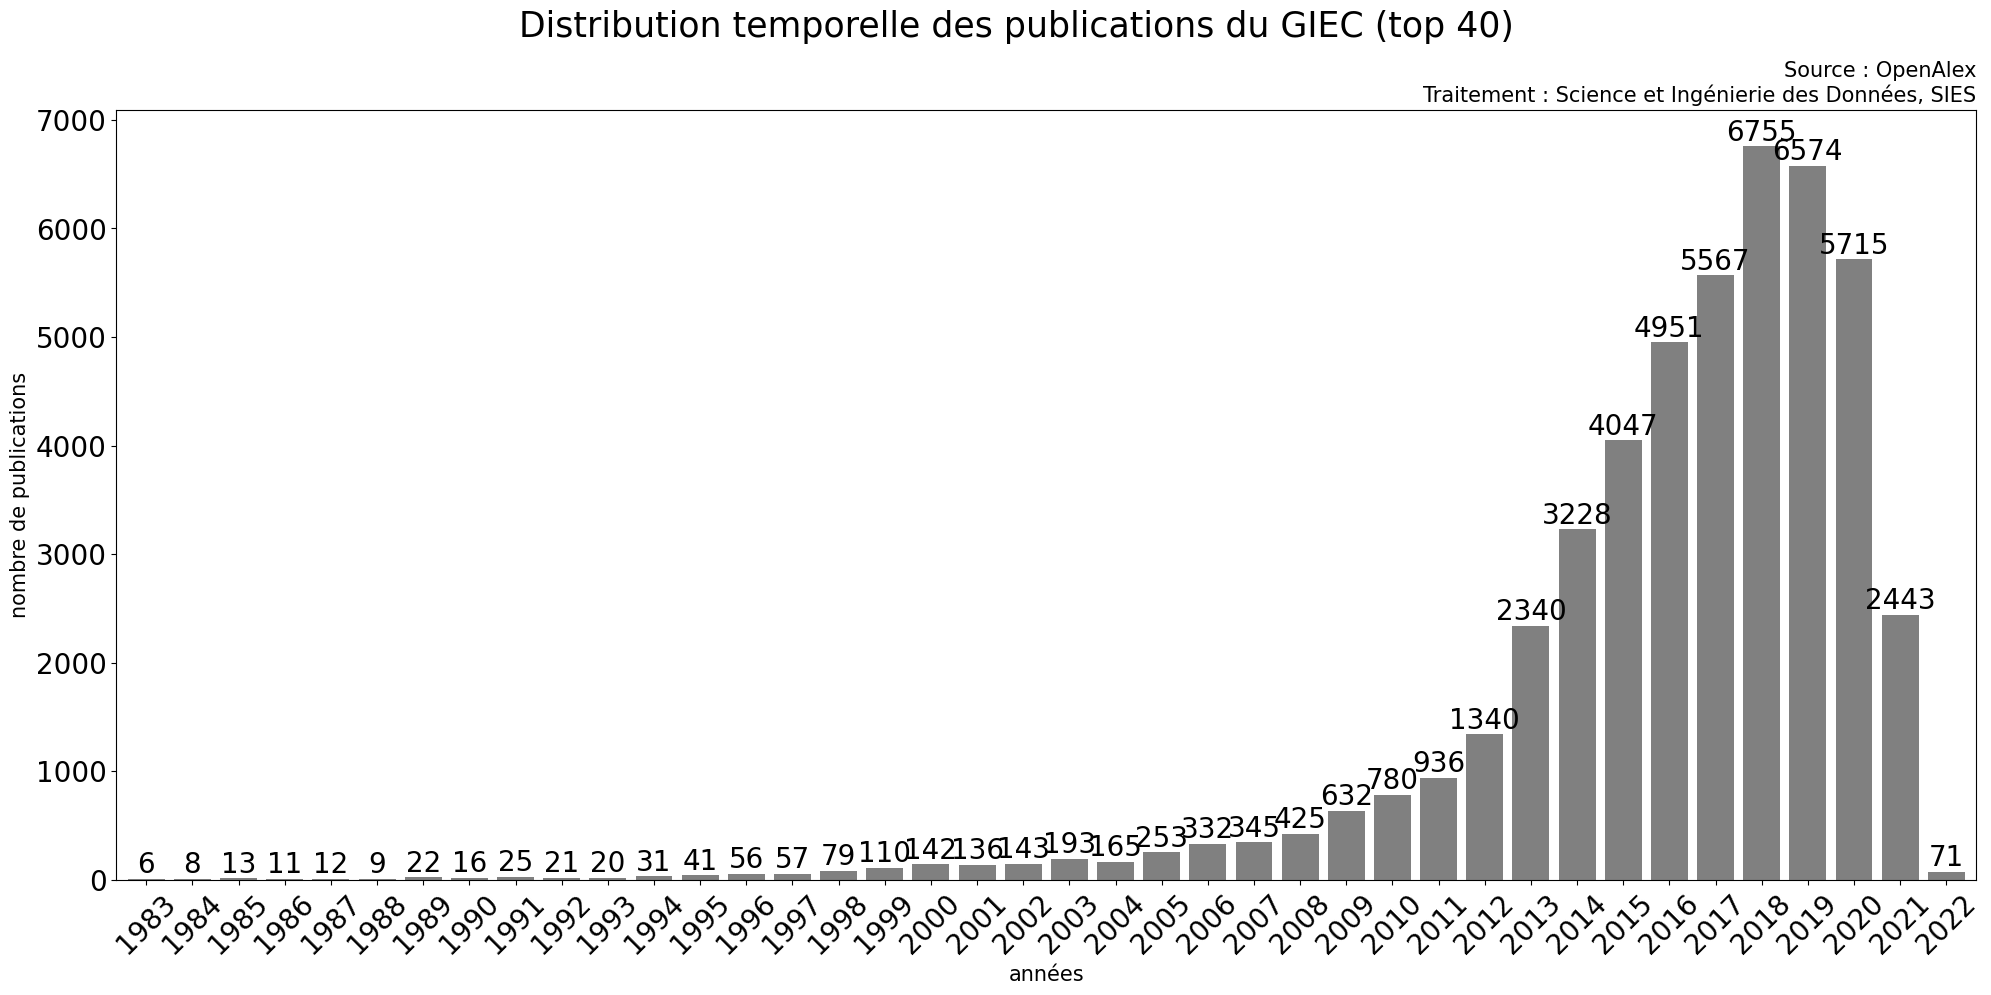

In [7]:
import matplotlib.pyplot as plt

data_counts=pd.Series([int(x) for x in list(df_ipcc.year.dropna())]).value_counts()
data_counts=pd.Series(dict(data_counts)).sort_index()
data_counts=data_counts[-40:]
plt.figure(figsize=(24, 10))
color_dict = {
'FR': '#BE2125'
}
ax = data_counts.plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts.index], width=0.8)

for i, v in enumerate(data_counts):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle(f"Distribution temporelle des publications du GIEC (top 40)", size=25)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=15, loc='right')

ax.set_xticklabels(data_counts.index, rotation=45, fontsize=20)
ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)
ax.set_ylabel(f'nombre de publications', fontsize=15)
ax.set_xlabel(f'années', fontsize=15)
plt.show()

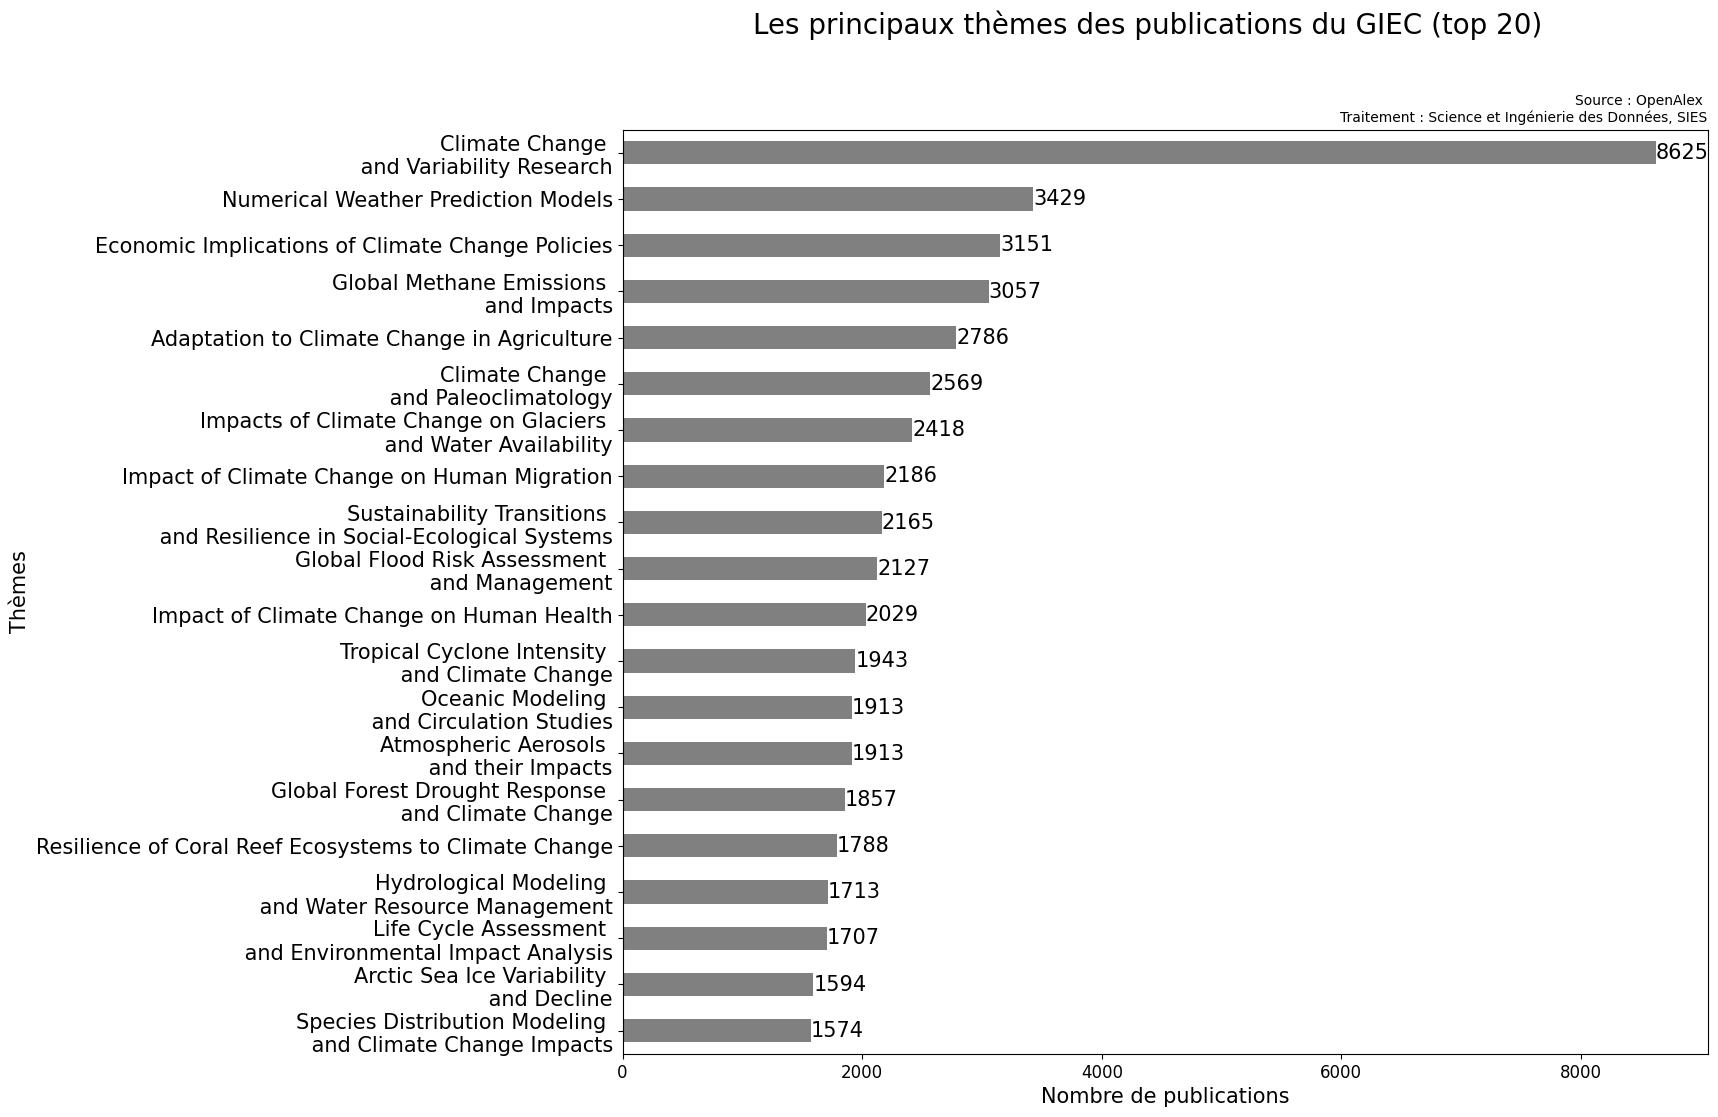

In [35]:
import matplotlib.pyplot as plt

data_counts=pd.Series(aplatir(list(df_ipcc.topics))).value_counts()
plt.figure(figsize=(14, 12))  
ax = data_counts[:20].plot(kind='barh', color='grey')  

for i, v in enumerate(data_counts[:20]):
    ax.text(v + 0.1, i, f'{v}', ha='left', va='center', color='black', size=15)  

plt.suptitle("Les principaux thèmes des publications du GIEC (top 20)", size=20)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

yticklabels = [label[:match_list[0]] + '\n ' + label[match_list[0]:] if (match_list := [match.start() for match in re.finditer('and', label)]) and len(match_list) > 0 else label for label in data_counts.index[:20]]
ax.set_yticklabels(yticklabels, fontsize=15)  
ax.set_xticklabels([f'{tick:.0f}' for tick in ax.get_xticks()], fontsize=12)  
ax.set_xlabel('Nombre de publications', fontsize=15)  
ax.set_ylabel('Thèmes', fontsize=15)  
plt.gca().invert_yaxis()  
plt.show()

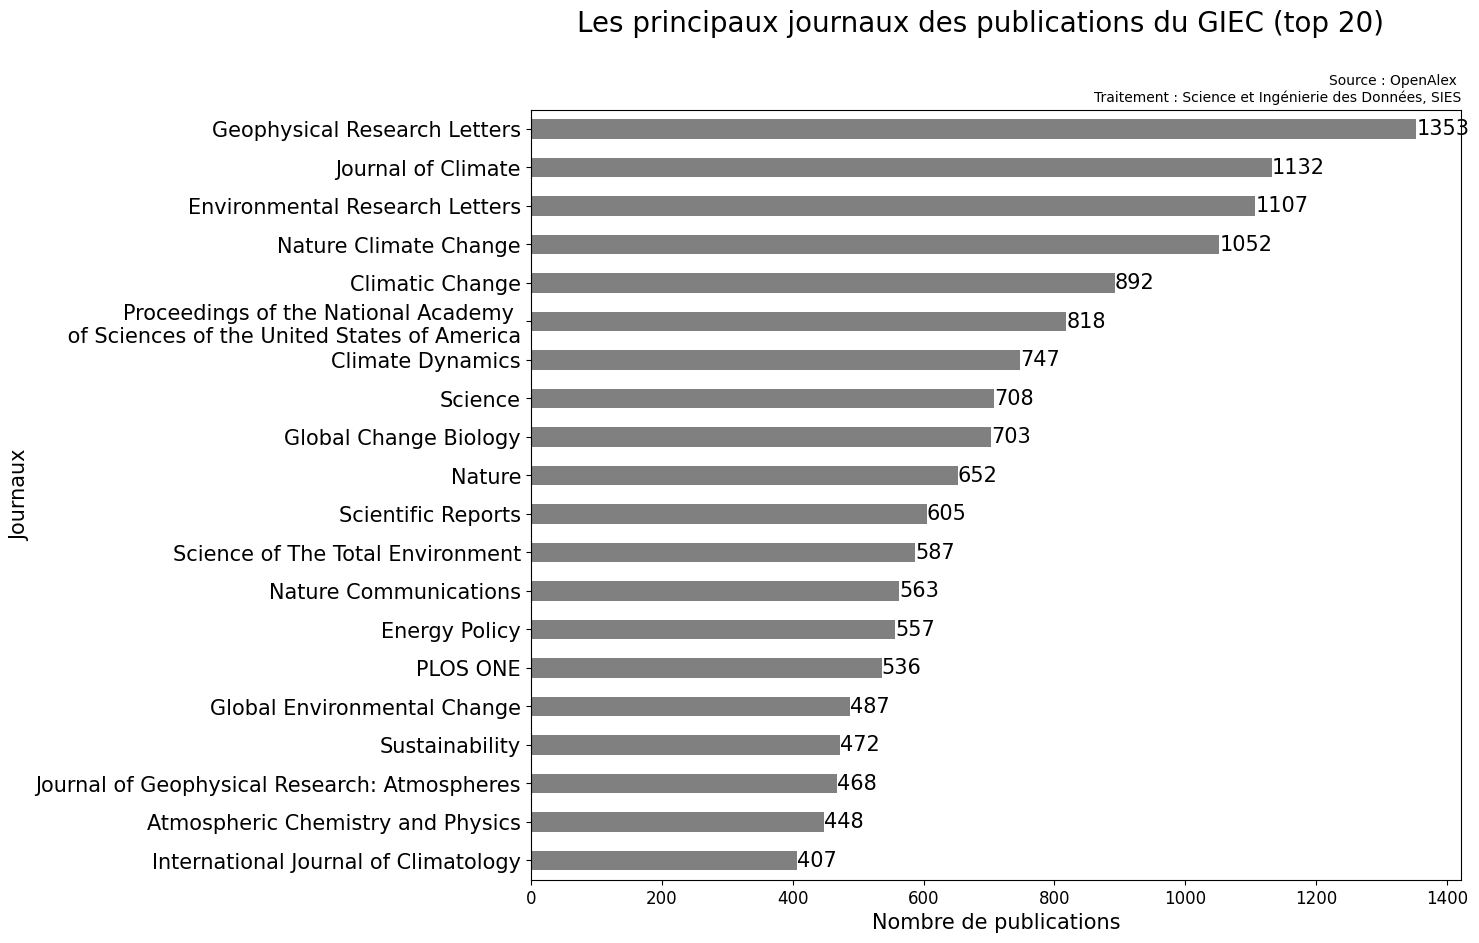

In [28]:
import matplotlib.pyplot as plt

data_counts=df_ipcc.locations_names.value_counts()
plt.figure(figsize=(12, 10))  
ax = data_counts[:20].plot(kind='barh', color='grey')  

for i, v in enumerate(data_counts[:20]):
    ax.text(v + 0.1, i, f'{v}', ha='left', va='center', color='black', size=15)  

plt.suptitle("Les principaux journaux des publications du GIEC (top 20)", size=20)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

yticklabels = [label[:match_list[1]] + '\n ' + label[match_list[1]:] if (match_list := [match.start() for match in re.finditer('of', label)]) and len(match_list) > 1 else label for label in data_counts.index[:20]]
ax.set_yticklabels(yticklabels, fontsize=15)  
ax.set_xticklabels([f'{tick:.0f}' for tick in ax.get_xticks()], fontsize=12)  
ax.set_xlabel('Nombre de publications', fontsize=15)  
ax.set_ylabel('Journaux', fontsize=15)  
plt.gca().invert_yaxis()  
plt.show()

building the learning dataset

In [9]:
print(len(df_ipcc),len(df_not_ipcc))

48219 48219


In [10]:
df_ipcc['label']=1
df_not_ipcc['label']=0

In [11]:
df_all=pd.concat([df_ipcc,df_not_ipcc]).reset_index()
del df_all['index']

In [12]:
df_all.to_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\data_model.json')

make vectors with embedding method

In [1]:
#pip install -U sentence-transformers

In [13]:
from sentence_transformers import SentenceTransformer, util

sentence_transformer_model = SentenceTransformer("thenlper/gte-large")

DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: thenlper/gte-large
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): huggingface.co:443
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /thenlper/gte-large/resolve/main/modules.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /thenlper/gte-large/resolve/main/config_sentence_transformers.json HTTP/1.1" 404 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /thenlper/gte-large/resolve/main/README.md HTTP/1.1" 200 0
DEBUG:urllib

In [14]:
def get_embeddings(text):
    tokvecs = sentence_transformer_model.encode(text, normalize_embeddings=True)
    return [float(e) for e in tokvecs]

In [15]:
df_all=pd.read_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\data_model.json')

In [16]:
ipcc_vectors=pd.read_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\ipcc_vectors.json')

In [17]:
df_all=pd.merge(df_all, ipcc_vectors, how='left', on='doi')

In [20]:
df_all.loc[pd.isna(df_all.title_vect),'title_vect']=df_all.loc[pd.isna(df_all.title_vect),'title'].apply(lambda x: get_embeddings(nfx.remove_stopwords(x.replace('{','').replace('}',''))))

Batches: 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]


In [21]:
print(len(df_all.title_vect.dropna()),len(df_all))

96438 96438


In [22]:
df_all[['doi','title_vect']].to_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\title.json')

In [23]:
df_all.loc[pd.isna(df_all.locations_names_vect),'locations_names_vect']=df_all.loc[pd.isna(df_all.locations_names_vect),'locations_names'].apply(lambda x: get_embeddings(nfx.remove_stopwords(x.lower().replace('journal','').replace('letters',''))))

Batches: 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]


In [25]:
print(len(df_all.locations_names_vect.dropna()),len(df_all))

96438 96438


In [24]:
df_all[['doi','locations_names_vect']].to_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\locations_names.json')

In [26]:
df_all.loc[pd.isna(df_all.locations_ids_vect),'locations_ids_vect']=df_all.loc[pd.isna(df_all.locations_ids_vect),'locations_ids'].apply(lambda x: get_embeddings(nfx.remove_stopwords(x)))

Batches: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


In [27]:
print(len(df_all.locations_ids_vect.dropna()),len(df_all))

96438 96438


In [28]:
df_all[['doi','locations_ids_vect']].to_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\locations_ids.json')

In [29]:
df_all.loc[pd.isna(df_all.topics_vect),'topics_vect']=df_all.loc[pd.isna(df_all.topics_vect),'topics'].apply(lambda x: get_embeddings(' '.join(x)) if isinstance(x,list) else None)

Batches: 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


In [30]:
print(len(df_all.topics_vect.dropna()),len(df_all))

96438 96438


In [31]:
df_all[['doi','topics_vect']].to_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\topics.json')

In [33]:
df_all.to_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\data_model.json')

read the embeddings

In [6]:
df_all=pd.read_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\data_model.json')

In [34]:
title=pd.read_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\title.json')

In [35]:
topics=pd.read_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\topics.json')

In [36]:
locations_ids=pd.read_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\locations_ids.json')

In [37]:
locations_names=pd.read_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\locations_names.json')

In [38]:
print(len(title),len(topics),len(locations_ids),len(locations_names))

96438 96438 96438 96438


In [40]:
ipcc_vectors=pd.read_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\ipcc_vectors.json')

In [17]:
df_ipcc_all=pd.merge(df_all[['doi','label']],pd.concat([title,topics['topics_vect'],locations_ids['locations_ids_vect'],locations_names['locations_names_vect']], axis=1), on='doi', how='right')

In [41]:
df_ipcc_all.to_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\data_model.json')

split the data into training and test datasets

In [2]:
df_all=pd.read_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_model_ipcc\\data_model.json')

In [3]:
df_all.label.value_counts()

label
1    48219
0    48219
Name: count, dtype: int64

In [4]:
dict_vect={}
for y in ['title','topics','locations_ids','locations_names']:
    dict_vect[y]=df_all[f"{y}_vect"].apply(pd.Series)
    dict_vect[y].columns=[f"{y}_dim_{x}" for x in dict_vect[y].columns]

In [5]:
features_df = pd.concat(list(dict_vect.values()), axis=1)

In [6]:
len(df_all['title_vect'][0])

1024

In [7]:
df_all.loc[:0,'title_vect'].apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.004634,0.023294,-0.022953,-0.039356,-0.019782,0.005144,0.011542,0.03605,0.03783,0.030261,...,0.029093,-0.035305,-0.031699,-0.026895,0.040567,0.054247,0.036724,-0.040223,-0.015669,-0.003462


In [8]:
X = features_df
y = df_all['label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random forest

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
import pickle

In [51]:
pickle.dump(model, open("ipcc_model_rd_forest.pkl", 'wb'))

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

0.9547386976358357

In [14]:
recall_score(y_test, y_pred)

0.9392407674850423

In [15]:
f1_score(y_test, y_pred)

0.954252476025782

In [16]:
confusion_matrix(y_test, y_pred)

array([[9310,  284],
       [ 589, 9105]], dtype=int64)

In [17]:
len(y_test)

19288

In [18]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns, 
                                   columns=["importance"]).sort_values("importance", ascending=False)

In [19]:
feature_importances

,importance
topics_dim_1,0.019575
topics_dim_992,0.016796
locations_names_dim_1,0.015383
topics_dim_1002,0.013810
title_dim_824,0.010744
...,...
locations_ids_dim_810,0.000024
locations_ids_dim_604,0.000024
title_dim_156,0.000024
locations_ids_dim_814,0.000021


In [24]:
pd.Series(y_pred)

0        1
1        0
2        0
3        0
4        0
        ..
19283    1
19284    0
19285    0
19286    1
19287    1
Length: 19288, dtype: int64

In [30]:
df_test=pd.concat([X_test,y_test], axis=1).reset_index()

In [34]:
df_test=pd.concat([df_test,pd.Series(y_pred)], axis=1)

In [38]:
df_test=df_test.rename(columns={0:'label_predicted'})

In [52]:
df_test[(df_test.label==0)&(df_test.label_predicted==1)][5:20]

,index,title_dim_0,title_dim_1,title_dim_2,title_dim_3,title_dim_4,title_dim_5,title_dim_6,title_dim_7,title_dim_8,...,locations_names_dim_1016,locations_names_dim_1017,locations_names_dim_1018,locations_names_dim_1019,locations_names_dim_1020,locations_names_dim_1021,locations_names_dim_1022,locations_names_dim_1023,label,label_predicted
292,55064,-0.004208,0.027454,-0.022399,-0.023233,-0.004944,-0.024945,0.013940,0.059784,0.016737,...,-0.013751,-0.031859,0.038319,0.059624,-0.013124,-0.006380,-0.006340,0.013049,0,1
432,53422,0.000035,0.031510,-0.019400,-0.008673,-0.012631,0.028803,0.014059,0.036756,0.026530,...,-0.026747,-0.055027,0.032072,0.059513,0.020293,0.027997,-0.006484,-0.003445,0,1
468,70020,-0.012855,0.010866,0.003884,0.015346,-0.022522,-0.028241,-0.018074,0.011730,0.017954,...,0.000305,-0.029376,0.030090,0.040993,0.030015,-0.023788,-0.005930,-0.018755,0,1
512,77802,-0.021275,0.016196,-0.027859,-0.019165,-0.013979,0.017290,0.018076,0.008448,0.015279,...,-0.027490,-0.025647,0.044511,0.033649,0.021755,-0.033561,0.006714,-0.020527,0,1
586,65013,-0.010326,0.013579,0.011040,0.016176,-0.027188,0.027960,-0.012996,0.032212,0.018077,...,-0.027229,-0.034254,0.040179,0.037065,0.018786,-0.003657,-0.014013,-0.006479,0,1
652,59203,-0.025380,0.009125,-0.049262,-0.006228,-0.018710,-0.005335,-0.009532,0.030096,0.000764,...,-0.030084,-0.049191,0.047777,0.062930,0.005688,0.001526,0.001291,-0.003760,0,1
654,68608,-0.052491,0.004693,-0.019431,-0.007682,-0.019326,0.005869,-0.005618,0.036754,0.026043,...,-0.056192,-0.032641,0.068148,0.038565,0.006664,0.021703,-0.042977,-0.019457,0,1
657,70170,0.016960,-0.002855,-0.000705,0.017239,-0.007366,0.001658,0.007258,0.028034,0.005673,...,-0.037522,-0.028606,0.019786,0.062497,0.016225,-0.006257,-0.012752,-0.013266,0,1
683,64345,-0.011079,0.014067,-0.000096,-0.013429,0.019999,0.032671,-0.035460,0.009351,0.006085,...,-0.034444,-0.035255,0.037512,0.051231,0.015602,-0.014817,-0.024531,-0.010561,0,1
711,71940,-0.027866,0.017679,-0.028272,0.027723,-0.011673,0.004848,-0.005964,0.024325,0.027210,...,-0.027974,-0.052483,0.042342,0.071224,-0.011696,-0.018727,-0.011995,0.000230,0,1


In [56]:
df_all.iloc[77802,:]

doi                          https://doi.org/10.1016/j.ijepes.2015.01.030
title                   A novel intelligent approach for yaw position ...
topics                  [Electricity Price and Load Forecasting Method...
locations_names         International journal of electrical power & en...
locations_ids                                                   0142-0615
label                                                                   0
title_vect              [-0.0212747063, 0.0161962528, -0.027859075, -0...
topics_vect             [-0.036383111, 0.031767983, -0.0162061565, -0....
locations_ids_vect      [0.0079218252, 0.0006003135000000001, -0.00713...
locations_names_vect    [-0.039496075400000004, 0.0059472779, -0.02910...
Name: 77802, dtype: object